In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import linregress
import scipy.stats as stats

#import csv
cta_df = pd.read_csv("CTA_Ridership.csv")
cta_df

,service_date,day_type,bus,rail_boardings,total_rides
0,01/01/2001,U,297192,126455,423647
1,01/02/2001,W,780827,501952,1282779
2,01/03/2001,W,824923,536432,1361355
3,01/04/2001,W,870021,550011,1420032
4,01/05/2001,W,890426,557917,1448343
...,...,...,...,...,...
7331,11/26/2020,U,119470,56839,176309
7332,11/27/2020,W,221878,106692,328570
7333,11/28/2020,A,198860,97141,296001
7334,11/29/2020,U,145682,76276,221958


In [2]:
#grab 2019 dates
first_df = cta_df[6636:6879]
second_df = cta_df[6953:7074]

#merge dataframes
full_2019 = pd.merge(first_df, second_df, how='outer')
full_2019

#change service_date column to string for easier manipulation
full_2019 = full_2019.astype({'service_date':'string'})
#split service_date column to isolate months
full_2019.service_date = full_2019.service_date.str.split('/', expand=True)
#recast service_date as int
full_2019 = full_2019.astype({'service_date':'int64'})
#bin and group by month
month_numbers = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
month_names = ["JAN", "FEB", "MAR", "APR", "MAY", "JUN", "JUL", "AUG", "SEPT", "OCT", "NOV", "DEC"]
full_2019['Month'] = pd.cut(full_2019['service_date'], month_numbers, labels=month_names)
month_grouped_2019 = full_2019.groupby(['Month']).sum()
#drop service_date column, rename columns
month_grouped_2019 = month_grouped_2019.drop(columns=['service_date'])
month_grouped_2019 = month_grouped_2019.rename(columns={'bus': 'Bus Boardings', 
                                                        'rail_boardings': 'Rail Boardings',
                                                       'total_rides': 'Total Rides'})
month_grouped_2019

,Bus Boardings,Rail Boardings,Total Rides
Month,,,
JAN,17453868,16068845,33522713
FEB,18278676,16356941,34635617
MAR,20267147,18019169,38286316
APR,19936880,18385649,38322529
MAY,21144868,19206970,40351838
JUN,19794294,18783743,38578037
JUL,19903917,19103898,39007815
AUG,19940708,19408958,39349666
SEPT,20478069,18821186,39299255


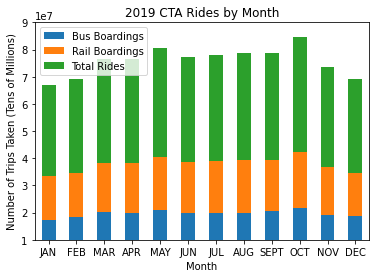

In [3]:
#make a bar graph of 2019 CTA travel
month_grouped_2019.plot.bar(stacked=True, rot=360)
plt.ylim(10000000, 90000000)
plt.title("2019 CTA Rides by Month")
plt.xlabel("Month")
plt.ylabel("Number of Trips Taken (Tens of Millions)")
fig = plt.gcf()
fig.savefig("2019plot.png");

In [4]:
#grab 2020 dates
third_df = cta_df[6879:6952]
fourth_df = cta_df[7074:]
#merge dataframes
full_2020 = pd.merge(third_df, fourth_df, how='outer')

#change service_date column to string for easier manipulation
full_2020 = full_2020.astype({'service_date':'string'})
#split service_date column to isolate months
full_2020.service_date = full_2020.service_date.str.split('/', expand=True)
#recast service_date as int
full_2020 = full_2020.astype({'service_date':'int64'})
full_2020['Month'] = pd.cut(full_2020['service_date'], month_numbers, labels=month_names)
#drop service_date column, empty December column, and rename columns
month_grouped_2020 = full_2020.groupby(['Month']).sum()
month_grouped_2020 = month_grouped_2020.drop(columns=['service_date'])
month_grouped_2020 = month_grouped_2020.drop(['DEC'])
month_grouped_2020 = month_grouped_2020.rename(columns={'bus': 'Bus Boardings', 
                                                        'rail_boardings': 'Rail Boardings',
                                                       'total_rides': 'Total Rides'})
month_grouped_2020

,Bus Boardings,Rail Boardings,Total Rides
Month,,,
JAN,19482387,17181153,36663540
FEB,19030115,16298769,35328884
MAR,13340656,9794464,23135120
APR,5851652,2266610,8118262
MAY,6822849,2235078,9057927
JUN,7331691,2955135,10286826
JUL,8608427,4255061,12863488
AUG,8540935,4260558,12801493
SEPT,8593214,4556719,13149933


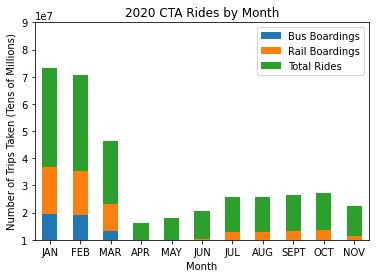

In [5]:
#make a bar graph of 2019 CTA travel
month_grouped_2020.plot.bar(stacked=True, rot=360)
plt.ylim(10000000, 90000000)
plt.title("2020 CTA Rides by Month")
plt.xlabel("Month")
plt.ylabel("Number of Trips Taken (Tens of Millions)")
fig2 = plt.gcf()
fig2.savefig("2020plot.png");

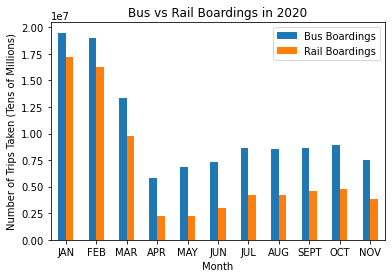

In [6]:
bus_v_rail = month_grouped_2020.drop(columns=['Total Rides'])
bus_v_rail.plot.bar(rot=360)
plt.title("Bus vs Rail Boardings in 2020")
plt.xlabel("Month")
plt.ylabel("Number of Trips Taken (Tens of Millions)")
fig4 = plt.gcf()
fig4.savefig("bus_v_rail.png");

In [55]:
fifth_df = cta_df[6879:6952]
sixth_df = cta_df[7074:]
#merge dataframes
daily_2020 = pd.merge(fifth_df, sixth_df, how='outer')
#isolate weeks before and after lockdown
that_week = daily_2020[73:88]
that_week = that_week.astype({'service_date': 'string'})
that_week[['Month','Date', 'Year']] = that_week.service_date.str.rsplit('/', expand=True)
that_week = that_week.drop(columns=['Month', 'Year', 'service_date'])
that_week = that_week.set_index(['Date'])
that_week = that_week.rename(columns = {'bus': 'Bus Boardings',
                                        'rail_boardings' : 'Rail Boardings',
                                       'total_rides': 'Total Rides'})
fig3, ax = plt.subplots()
that_week.plot.bar(stacked=True, ax=ax, rot=360)
plt.title('CTA Rides Before and After March 21st Lockdown')
plt.ylabel('Number of Trips Taken (Millions)')
#code from:
#https://stackoverflow.com/questions/61606615/pandas-dataframe-how-to-add-a-vertical-line-with-label-to-a-bar-plot-when-your
ax.axvline(that_week.index.searchsorted('21'), color="red", linestyle="--", lw=2, label="Lockdown");
fig3.savefig("lockdownplot.png");

In [4]:
#perform t-test on 2019 vs 2020
results = stats.ttest_ind(month_grouped_2019, month_grouped_2020, equal_var=False)

#retrieve p-value of bus, rail, and total boardings
bus_pvalue = results[1][0]
rail_pvalue = results[1][1]
total_boarding_pvalue = results[1][2]
print(f"The p-value for bus boardings was {bus_pvalue}.")
print(f"The p-value for rail boardings was {rail_pvalue}.")
print(f"The p-value for total boardings was {total_boarding_pvalue}.")

The p-value for bus boardings was 5.3341672537711424e-05.
The p-value for rail boardings was 2.307778866896564e-05.
The p-value for total boardings was 3.429185108766919e-05.
